In [42]:
import sys
import logging
import pickle
import yaml
import matplotlib.cm as cm
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import time
import seaborn as sns
from configs import engram_dir

# Implicit Quantile Networks

### Parameters

In [219]:
internal_dim = 10
episode = 600 #350

# IQN
generic_exp_name = 'iqn2_discount07'
generic_exp_name = 'iqn3'
network_yaml = 'iqn'
model = f'{generic_exp_name}_mf0'

# Default
# internal_dim = 12
# generic_exp_name = 'new_gridworld8x8'
# network_yaml = 'dm'
# model = f'{generic_exp_name}_mf0'

exp_name = f'{generic_exp_name}_{network_yaml}_dim{internal_dim}'
nnets_dir = f'{engram_dir}nnets/{exp_name}/'
pickle_dir = f'{engram_dir}pickles/{exp_name}/'
analysis_dir = f'{engram_dir}analysis/{exp_name}/'

### Load

In [220]:
with open(f'{analysis_dir}representation_df_ep{episode}.p', 'rb') as f:
    df = pickle.load(f)

In [221]:
def plot_actions(df):
    # Determine the grid size
    n_rows = df['x'].max() + 2
    n_cols = df['y'].max() + 2

    # Initialize a figure
    fig, ax = plt.subplots(figsize=(4, 4))

    # Create a meshgrid for arrow positions
    X, Y = np.meshgrid(range(n_cols), range(n_rows))

    # Initialize an empty array for directions
    U, V = np.zeros_like(X, dtype=float), np.zeros_like(Y, dtype=float)

    # Map actions to arrow directions (0: down, 1: left, 2: up, 3: right)
    action_to_dxdy = {
        0: (-1, 0),
        1: (1, 0),
        2: (0, -1),
        3: (0, 1)
    }

    for _, row in df.iterrows():
        dx, dy = action_to_dxdy[row['chosen_action']]
        U[row['y'], row['x']] = dx
        V[row['y'], row['x']] = dy

    # Plot the arrows
    ax.quiver(X, Y, U, V, pivot='mid')

    goal_x, goal_y = np.unique(df['goal_state'])[0]
    ax.plot(goal_x, goal_y, 'r*', markersize=15)  # 'r*' creates a red star, adjust size as needed


    plt.show()

# Plot

In [222]:
iteration = 0

In [223]:
_df = df[(df['iteration']==iteration)&(df['model']==model)]

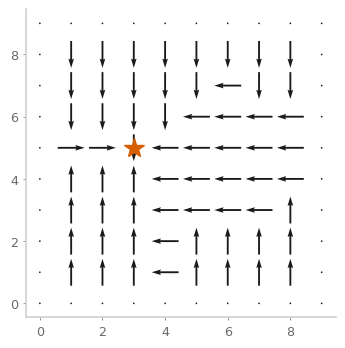

In [224]:
plot_actions(_df)

# Plot

In [216]:
iteration = 1

In [217]:
_df = df[(df['iteration']==iteration)&(df['model']==model)]

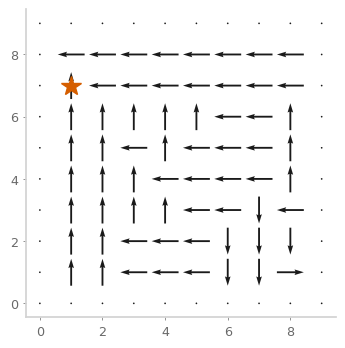

In [218]:
plot_actions(_df)

# Plot

In [207]:
iteration = 2

In [208]:
_df = df[(df['iteration']==iteration)&(df['model']==model)]

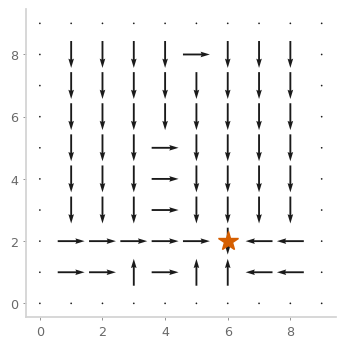

In [209]:
plot_actions(_df)